In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

# test = pd.read_csv('mnist_test.csv', names=[f"x{i}" for i in range(784)] + ["y"])
# train = pd.read_csv('mnist_train.csv', names=[f"x{i}" for i in range(784)] + ["y"])
test = pd.read_csv('mnist_test.csv',header=None)
train = pd.read_csv('mnist_train.csv', header=None)

In [2]:
def preprocess(data):
    X = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    digits = {j:[] for j in range(10)}
    for j in range(len(y)):
        cur_label = int(y[j])
        cur_pixel_data = np.array(X.iloc[j]).reshape(28,28)
        digits[cur_label].append(cur_pixel_data)
    digits = {j:np.stack(digits[j]) for j in range(10)}
    for j in range(10):
        print('shape of data with label', j, ':', digits[j].shape)
    
    return digits

train_digits = preprocess(train)
test_digits = preprocess(test)

shape of data with label 0 : (5923, 28, 28)
shape of data with label 1 : (6742, 28, 28)
shape of data with label 2 : (5958, 28, 28)
shape of data with label 3 : (6131, 28, 28)
shape of data with label 4 : (5842, 28, 28)
shape of data with label 5 : (5421, 28, 28)
shape of data with label 6 : (5918, 28, 28)
shape of data with label 7 : (6265, 28, 28)
shape of data with label 8 : (5851, 28, 28)
shape of data with label 9 : (5949, 28, 28)
shape of data with label 0 : (980, 28, 28)
shape of data with label 1 : (1135, 28, 28)
shape of data with label 2 : (1032, 28, 28)
shape of data with label 3 : (1010, 28, 28)
shape of data with label 4 : (982, 28, 28)
shape of data with label 5 : (892, 28, 28)
shape of data with label 6 : (958, 28, 28)
shape of data with label 7 : (1028, 28, 28)
shape of data with label 8 : (974, 28, 28)
shape of data with label 9 : (1009, 28, 28)


In [3]:
train_four_data = train_digits[4]
train_nine_data = train_digits[9]

train_four_labels = np.ones(len(train_four_data))*-1
train_nine_labels = np.ones(len(train_nine_data))

train_four_data = np.reshape(train_four_data, (len(train_four_data), 28*28))
train_nine_data = np.reshape(train_nine_data, (len(train_nine_data), 28*28))

train_four_data = train_four_data[:500]
train_nine_data = train_nine_data[:500]

train_four_labels = train_four_labels[:500]
train_nine_labels = train_nine_labels[:500]

train_data = np.concatenate((train_four_data, train_nine_data))
train_labels = np.concatenate((train_four_labels, train_nine_labels))

train_four_data = train_four_data[:500]
train_nine_data = train_nine_data[:500]

train_four_labels = train_four_labels[:500]
train_nine_labels = train_nine_labels[:500]

train_data = np.concatenate((train_four_data, train_nine_data))
train_labels = np.concatenate((train_four_labels, train_nine_labels))

train_data.shape, train_labels.shape

((1000, 784), (1000,))

In [4]:
test_four_data = test_digits[4]
test_nine_data = test_digits[9]

test_four_labels = np.ones(len(test_four_data))*-1
test_nine_labels = np.ones(len(test_nine_data))

test_four_data = np.reshape(test_four_data, (len(test_four_data), 28*28))
test_nine_data = np.reshape(test_nine_data, (len(test_nine_data), 28*28))

test_four_data = test_four_data[:500]
test_nine_data = test_nine_data[:500]

test_four_labels = test_four_labels[:500]
test_nine_labels = test_nine_labels[:500]

test_data = np.concatenate((test_four_data, test_nine_data))
test_labels = np.concatenate((test_four_labels, test_nine_labels))

test_data.shape, test_labels.shape

((1000, 784), (1000,))

In [5]:
np.zeros(train_data.shape[1]).shape

(784,)

In [6]:
# def grad_F(w, X, y):
#     exp_val = np.exp(-y * (X @ w))
#     grad = (-exp_val / (1 + exp_val))[:, np.newaxis] * y[:, np.newaxis] * X
#     return grad.mean(axis=0)

# # Rest of your code remains the same


# def F(w, X, y):
#     F = np.log(1 + np.exp(-y * (X @ w))).mean()
#     return F

# def gradient_w_momentum(lr=0.01, beta=0.1, max_iter=2000, tol=1e-6):
#     X, y = train_data, train_labels
#     w = np.zeros(X.shape[1])  # Initialize weights
#     v = np.zeros(X.shape[1])  # Initialize velocity for momentum
#     losses = []

#     for i in range(max_iter):
#         losses.append(F(w, X, y))
#         gradient = grad_F(w, X, y)

#         v = beta * v + lr * gradient  # Update velocity
#         w = w - v  # Update weights

#         # if np.linalg.norm(gradient) < tol:
#         #     break

#     return w, losses

# w, losses = gradient_w_momentum()


In [7]:
def logistic_loss(w, X, y):
    z = np.dot(X,w)
    log_loss = np.log(1 + np.exp(-y * z))
    log_loss = np.clip(log_loss, a_min=None, a_max=500)
    return np.mean(log_loss)

def logistic_loss_gradient(w, X, y):
    z = np.dot(X, w)
    sigmoid = 1 / (1 + np.exp(-z))
    gradient = np.dot(X.T, (sigmoid - (y==1))) / X.shape[0]
    return gradient

In [8]:
def gradient_w_momentum(X, y, lr=0.01, beta=0.3, max_iter=2000, tol=1e-6):
    w = np.zeros(X.shape[1])  # Initialize weights
    v = np.zeros(X.shape[1])  # Initialize velocity for momentum
    losses = []

    for i in range(max_iter):
        loss = logistic_loss(w, X, y)
        losses.append(loss)
        gradient = logistic_loss_gradient(w, X, y)

        v = beta * v + lr * gradient  # Update velocity
        w = w - v  # Update weights

        if np.linalg.norm(gradient) < tol:
            break

    return w, losses

w, losses = gradient_w_momentum(train_data, train_labels)


/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_6815/2744043377.py:3: RuntimeWarning: overflow encountered in exp
  log_loss = np.log(1 + np.exp(-y * z))
/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_6815/2744043377.py:9: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))


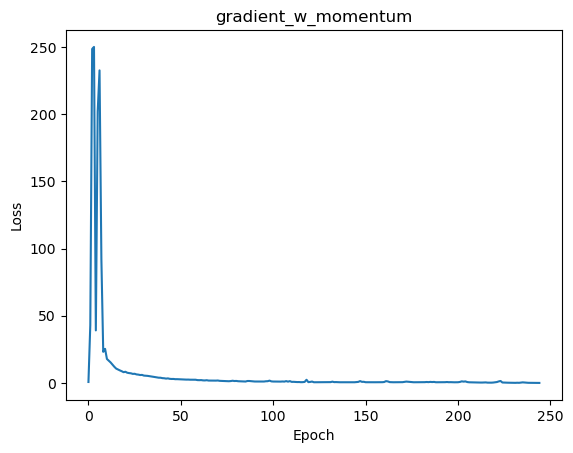

In [9]:
plt.plot(losses)
plt.title('gradient_w_momentum')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.show()
plt.close()


In [10]:
def gradient_w_Nesterov(X, y, lr=0.01, beta=0.3, max_iter=2000, tol=1e-6):
    w = np.zeros(X.shape[1])  # Initialize weights
    v = np.zeros(X.shape[1])  # Initialize velocity for momentum
    losses = []

    for i in range(max_iter):
        loss = logistic_loss(w, X, y)
        losses.append(loss)
        yt = w + beta * (w - v)
        gradient = logistic_loss_gradient(yt, X, y)

        v = w
        w = yt - lr * gradient  # Update velocity


        if np.linalg.norm(gradient) < tol:
            break

    return w, losses

w, losses = gradient_w_Nesterov(train_data, train_labels)

/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_6815/2744043377.py:3: RuntimeWarning: overflow encountered in exp
  log_loss = np.log(1 + np.exp(-y * z))
/var/folders/90/9f8yk06x5m5cqysc4rrbrs_c0000gn/T/ipykernel_6815/2744043377.py:9: RuntimeWarning: overflow encountered in exp
  sigmoid = 1 / (1 + np.exp(-z))


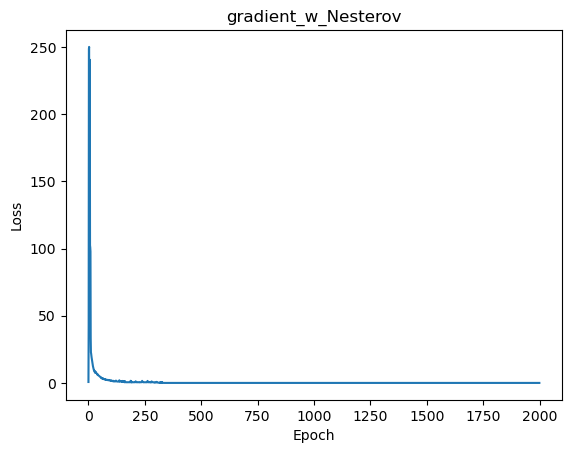

In [11]:
plt.plot(losses)
plt.title('gradient_w_Nesterov')
plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.show()
plt.close()